## Boolean Query processing algorithm 

### In an inverted index, we have data from {document[term]} to {posting list}

Eg. 

| Term      | -> | Postings List                          |
|-----------|----|----------------------------------------|
| Brutus    | -> | 1, 2, 4, 11, 31, 45, 173, 174          |
| Caesar    | -> | 1, 2, 4, 5, 6, 16, 57, 132, ...        |
| Calpurnia | -> | 2, 31, 54, 101                         |


---

## 1. Algorithm for ``AND`` operation between two posting list.

```py
Input: p1, p2 (sorted postings lists)
Output: answer = p1 ∩ p2



answer ← []                             # initialize an empty list (answer)

while (p1 ≠ NIL) AND (p2 ≠ NIL):        # run until both list are not empty
    do:
    if(docId(p1) = docId(p2)):          # compare if current docId in P1 & P2 are equal, then add anone in answer
        Add (answer, docId(p1))
        p1 <- next(p1)
        p2 <- next(p2)                  # advance both pointer, becuase we have already handled this document
    
    else if(docId(p1) < docId(p2)):
        p1 <- next(p1)                  # becuase smaller p1 cannot appear in p2 anymore

        else:
            p2 <- next(p2)              # smaller p2, cannot appear in p1 anymore.

return answer

```

---

## 2. Algorithm for ``OR`` operation in 2 posting list.

```py
Input: p1, p2 (sorted postings lists)
Output: answer = p1 ∪ p2

answer ← []                             # initialize an empty list (answer)

while (p1 ≠ NIL) AND (p2 ≠ NIL):        # run until both lists are not empty
    do:
    if(docId(p1) = docId(p2)):          # if current docIds are equal, add once
        Add(answer, docId(p1))
        p1 <- next(p1)
        p2 <- next(p2)                  # advance both pointers

    else if(docId(p1) < docId(p2)):
        Add(answer, docId(p1))          # add the smaller docId
        p1 <- next(p1)                  # advance p1

    else:
        Add(answer, docId(p2))          # add the smaller docId
        p2 <- next(p2)                  # advance p2

# Add remaining docIds from p1 (if any)
while (p1 ≠ NIL):
    Add(answer, docId(p1))
    p1 <- next(p1)

# Add remaining docIds from p2 (if any)
while (p2 ≠ NIL):
    Add(answer, docId(p2))
    p2 <- next(p2)

return answer

```

---

## 3. Algorithm for ``INTERSECTION with negation – AND NOT `` operation in 2 posting list.

A naive implementation of the query ``x AND (NOT y)`` would be to evaluate (NOT y) first as a new posting list, which takes O(N) time, and the merge it with x. Therefore, the overall complexity will be O(N). 


OR ``A-B``

```py
Input: p1, p2 (sorted postings lists)
Output: answer = p1 ∩ ¬p2               # documents in p1 but not in p2 (p1-p2)

answer ← []                             # initialize an empty list (answer)

while (p1 ≠ NIL) AND (p2 ≠ NIL):        # run until both lists are not empty
    do:
    if(docId(p1) = docId(p2)):          # doc appears in both → skip it
        p1 <- next(p1)
        p2 <- next(p2)

    else if(docId(p1) < docId(p2)):     # doc in p1 not in p2 → keep it (vlaue in p1 is small, so it can not appear in p2)
        Add(answer, docId(p1))
        p1 <- next(p1)

    else:                               # doc in p2 smaller → skip it
        p2 <- next(p2)

# Add remaining docIds from p` (if any)
while (p1 ≠ NIL):
    Add(answer, docId(p1))
    p1 <- next(p1)

return answer

```

---

## 4. Algorithm for ``XOR`` operation in 2 posting list.

XOR (Exclusive OR) – Retrieve documents that contain either term x or term y, but not both.


```py
Input: p1, p2 (sorted postings lists)
Output: answer = p1 ⊕ p2                    # documents in p1 or p2 but not both

answer ← []                                 # initialize an empty list (answer)

while (p1 ≠ NIL) AND (p2 ≠ NIL):            # run until both lists are not empty
    do:
    if(docId(p1) = docId(p2)):              # doc appears in both → skip it
        p1 <- next(p1)
        p2 <- next(p2)

    else if(docId(p1) < docId(p2)):         # doc in p1 only → keep it
        Add(answer, docId(p1))
        p1 <- next(p1)

    else:                                   # doc in p2 only → keep it
        Add(answer, docId(p2))
        p2 <- next(p2)

# Add remaining docIds from x (if any)
while (p1 ≠ NIL):
    Add(answer, docId(p1))
    p1 <- next(p1)

# Add remaining docIds from y (if any)
while (p2 ≠ NIL):
    Add(answer, docId(p2))
    p2 <- next(p2)

return answer

```

---

### Describe a step-by-step algorithm to compute the symmetric difference of two postings lists. Analyze the time complexity of your algorithm if both postings lists are sorted and of size n and m respectively. 

So symmetric difference is basically the `XOR` operation. i.e Present in A, present in B, but not present in A and B at same time. 

The **symmetric difference** of two sets $X$ and $Y$ is:

$$
X \; \triangle \; Y = (X \cup Y) - (X \cap Y)
$$

* In postings lists terms: documents that appear in **exactly one** of the two lists, not in both.
* Same as XOR: `x ⊕ y`.


#### Step-by-Step Explanation

1. Initialize an empty list for results.
2. Use two pointers to traverse the sorted lists simultaneously.
3. If the current docIDs are **equal**, skip them (they appear in both).
4. If the docID in `p1` is smaller → add to result and advance `p1`.
5. If the docID in `p2` is smaller → add to result and advance `p2`.
6. After one list ends, append any remaining docIDs from the other list.
7. Return the result — all docIDs that appear in **exactly one** of the lists.

#### Time Complexity

Let:

* `n` = length of `p1`

* `m` = length of `p2`

* The algorithm scans **each list at most once**.

* Each comparison advances at least one pointer.

$$
\text{Time Complexity} = O(n + m)
$$

* Space Complexity = `O(n + m)` in the worst case (if there are no common elements).


---

## 5. Algorithm for ``Double Negation with Conjunction`` operation in 2 posting list.

#### Compute the result of the query: ``(NOT x) AND (NOT y)``

- Assume the total number of documents is N, and 
- the postings lists of x = n
- the postings lists of y = m

#### (i) Implement an efficient algorithm to compute the intersection of the complements.
#### (ii) Analyze the time complexity. 




$$
(\text{NOT } x) \; \text{AND} \; (\text{NOT } y)
$$


**Given:**

* Total number of documents = `N`
* Postings list of `x` = size `n`
* Postings list of `y` = size `m`

**Goal:** Compute:

$$
(\text{NOT } x) \cap (\text{NOT } y) = \text{documents that are NOT in } x \text{ AND NOT in } y
$$

**Observation:**

By **De Morgan’s Law**:

$$
(\text{NOT } x) \cap (\text{NOT } y) = \text{NOT } (x \cup y)
$$

1. **First Law (Complement of Intersection):**

$$
\overline{A} \cup \overline{B} = \overline{A \cap B}
$$

2. **Second Law (Complement of Union):**

$$
\overline{A} \cap \overline{B} = \overline{A \cup B}
$$

- So instead of explicitly computing complements and then intersecting, we can:

1. Compute the **union** of `x` and `y` → `x ∪ y`
2. Take the **complement** relative to the total documents → $\overline{A \cup B}$

This is **much more efficient** than materializing the complements of `x` and `y` individually (which would take `O(N)` each).

## Efficient Algorithm

```py
Input: x, y (sorted postings lists), N (total number of documents)
Output: answer = (NOT x) AND (NOT y)

Step 1: Compute the union of x and y
    union_xy ← UNION(x, y)                  # Use merge-style OR algorithm

Step 2: Compute the complement of the union
    answer ← []                             # initialize empty list
    doc_id ← 1                              # assuming docIDs start from 1

    for each id in union_xy:
        while doc_id < id:
            Add(answer, doc_id)             # doc_id not in union → add to answer
            doc_id ← doc_id + 1
        doc_id ← doc_id + 1                  # skip the id in union

    # Add any remaining documents after the last union id
    while doc_id ≤ N:
        Add(answer, doc_id)
        doc_id ← doc_id + 1

return answer
```

#### Step-by-Step Explanation

1. **Union:** Combine `x` and `y` into a single sorted list of docIDs that appear in either list.
2. **Complement:** Scan from 1 to `N`, and for every docID **not in the union**, add it to the result.
3. **No need to compute `NOT x` and `NOT y` separately**, which saves a lot of time.

#### Time Complexity

Let:

* `n = |x|`
* `m = |y|`
* `N =` total number of documents

**Step 1 (union):**

* Merge two sorted lists → `O(n + m)`

**Step 2 (complement):**

* Scans through the union list while generating missing docIDs → `O(N)` in the worst case

* **Total complexity:** `O(n + m + N)`

* Space complexity: `O(N - |x ∪ y|)` for the answer.



---

# Questions based on Boolean Retrieval Model

## Question 1:  Consider these documents: 

- Doc1= English tutorial and fast track
- Doc2 = learning latent semantic indexing 
- Doc3 = Book on semantic indexing
- Doc4 = Advance in structure and semanticindexing
- Doc5 = Analysis of latent structures 

Draw the term‐document incidence matrix for this
document collection. 

Query problem:
    - Advance AND structure AND NOT analysis


## Solution:

<details>
<summary>Click for Solution</summary>


Step 1: Build the Term Document Incidence Matrix.


| Terms      | Doc1 | Doc2 | Doc3 | Doc4 | Doc5 |
| ---------- | ---- | ---- | ---- | ---- | ---- |
| English    | 1    | 0    | 0    | 0    | 0    |
| Tutorial   | 1    | 0    | 0    | 0    | 0    |
| Fast       | 1    | 0    | 0    | 0    | 0    |
| Track      | 1    | 0    | 0    | 0    | 0    |
| Books      | 0    | 1    | 0    | 0    | 0    |
| Semantic   | 0    | 1    | 1    | 1    | 0    |
| Analysis   | 0    | 1    | 0    | 0    | 1    |
| Learning   | 0    | 0    | 1    | 0    | 0    |
| Latent     | 0    | 0    | 1    | 0    | 1    |
| Indexing   | 0    | 0    | 1    | 1    | 0    |
| Advance    | 0    | 0    | 0    | 1    | 0    |
| Structures | 0    | 0    | 0    | 1    | 1    |

Step 2: Vector of Advance, Structure and Not Analysis.


| Terms      | Doc1 | Doc2 | Doc3 | Doc4 | Doc5 |
| ---------- | ---- | ---- | ---- | ---- | ---- |
| Advance    | 0    | 0    | 0    | 1    | 0    |
| Structures | 0    | 0    | 0    | 1    | 1    |
| Advance and Structures |  0    | 0    | 0    | 1    | 0    |
| Not Analysis   | 1    | 0    | 1    | 1    | 0    |
| Advance AND structure AND NOT analysis   | 0    | 0    | 0    | **1**   | 0    |

**Answer:** $\boxed{\textbf{Doc 4}}$





---

## Question 2: Consider these documents:

  * **Doc 1:** breakthrough drug for schizophrenia
  * **Doc 2:** new schizophrenia drug 
  * **Doc 3:** new approach for treatment of schizophrenia 
  * **Doc 4:** new hopes for schizophrenia patients

1. Draw the term-document incidence matrix for this document collection.

2. Draw the inverted index representation for this collection. 

Query problem:

  * `schizophrenia AND drug`
  * `for AND NOT (drug OR approach)`

## Solution:


<details>
<summary>Click for Solution</summary>

**Part 1:** Build the Term-Document Incidence Matrix.

| Terms | Doc1 | Doc2 | Doc3 | Doc4 |
| :--- | :--- | :--- | :--- | :--- |
| **approach** | 0 | 0 | 1 | 0 |
| **breakthrough** | 1 | 0 | 0 | 0 |
| **drug** | 1 | 1 | 0 | 0 |
| **for** | 1 | 0 | 1 | 1 |
| **hopes** | 0 | 0 | 0 | 1 |
| **new** | 0 | 1 | 1 | 1 |
| **of** | 0 | 0 | 1 | 0 |
| **patients** | 0 | 0 | 0 | 1 |
| **schizophrenia** | 1 | 1 | 1 | 1 |
| **treatment** | 0 | 0 | 1 | 0 |

**Part 2:** Solve the query `schizophrenia AND drug` using the vectors.

| Terms | Doc1 | Doc2 | Doc3 | Doc4 |
| :--- | :--- | :--- | :--- | :--- |
| schizophrenia | 1 | 1 | 1 | 1 |
| drug | 1 | 1 | 0 | 0 |
| **schizophrenia AND drug** | **1** | **1** | 0 | 0 |

**Answer:** $$\boxed{\textbf{Doc 1 \& Doc 2}}$$

**Part 3:** Query `for AND NOT(drug OR approach)`.

| Terms | Doc1 | Doc2 | Doc3 | Doc4 |
| :--- | :--- | :--- | :--- | :--- |
| `for` | 1 | 0 | 1 | 1 |
| `drug` | 1 | 1 | 0 | 0 |
| `approach` | 0 | 0 | 1 | 0 |

Evaluate the query `for AND NOT(drug OR approach)`.

| Operation | Doc1 | Doc2 | Doc3 | Doc4 |
| :--- | :--- | :--- | :--- | :--- |
| (`drug` OR `approach`) | 1 | 1 | 1 | 0 |
| NOT (`drug` OR `approach`) | 0 | 0 | 0 | 1 |
| `for` | 1 | 0 | 1 | 1 |
| **`for` AND NOT(...)** | 0 | 0 | 0 | **1** |

**Answer:** $\boxed{\textbf{Doc 4}}$


**Part 4:** **Inverted Index:** 

* `approach` $\rightarrow$ {3}
* `breakthrough` $\rightarrow$ {1}
* `drug` $\rightarrow$ {1, 2}
* `for` $\rightarrow$ {1, 3, 4}
* `hopes` $\rightarrow$ {4}
* `new` $\rightarrow$ {2, 3, 4}
* `of` $\rightarrow$ {3}
* `patients` $\rightarrow$ {4}
* `schizophrenia` $\rightarrow$ {1, 2, 3, 4}
* `treatment` $\rightarrow$ {3}
</details>

---

## Question 3: Draw the inverted index that would be built for the following document collection. 

* **Doc 1:** new home sales top forecasts  
* **Doc 2:** home sales rise in july  
* **Doc 3:** increase in home sales in july  
* **Doc 4:** july new home sales rise  



### Solution

<details>
<summary>Click for Solution</summary>

**Inverted Index:**

> img: answer3

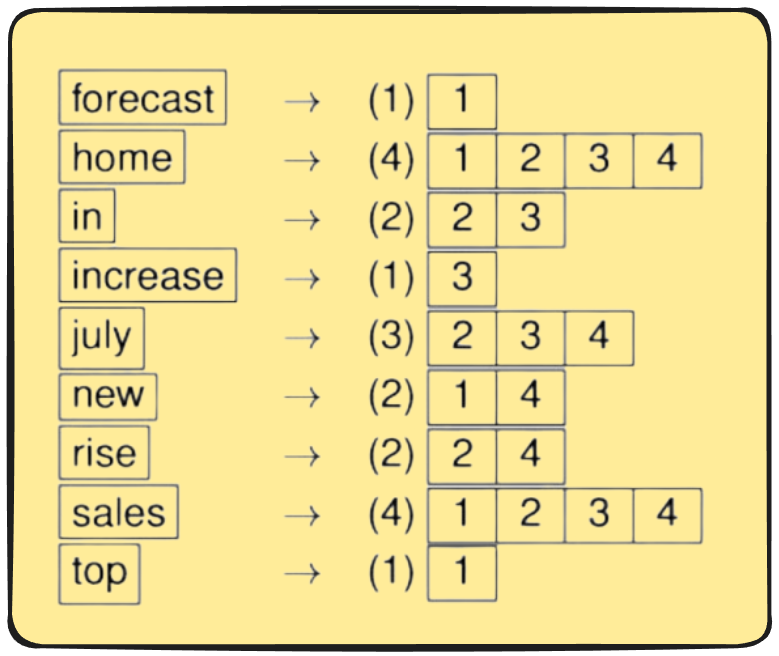

</details>

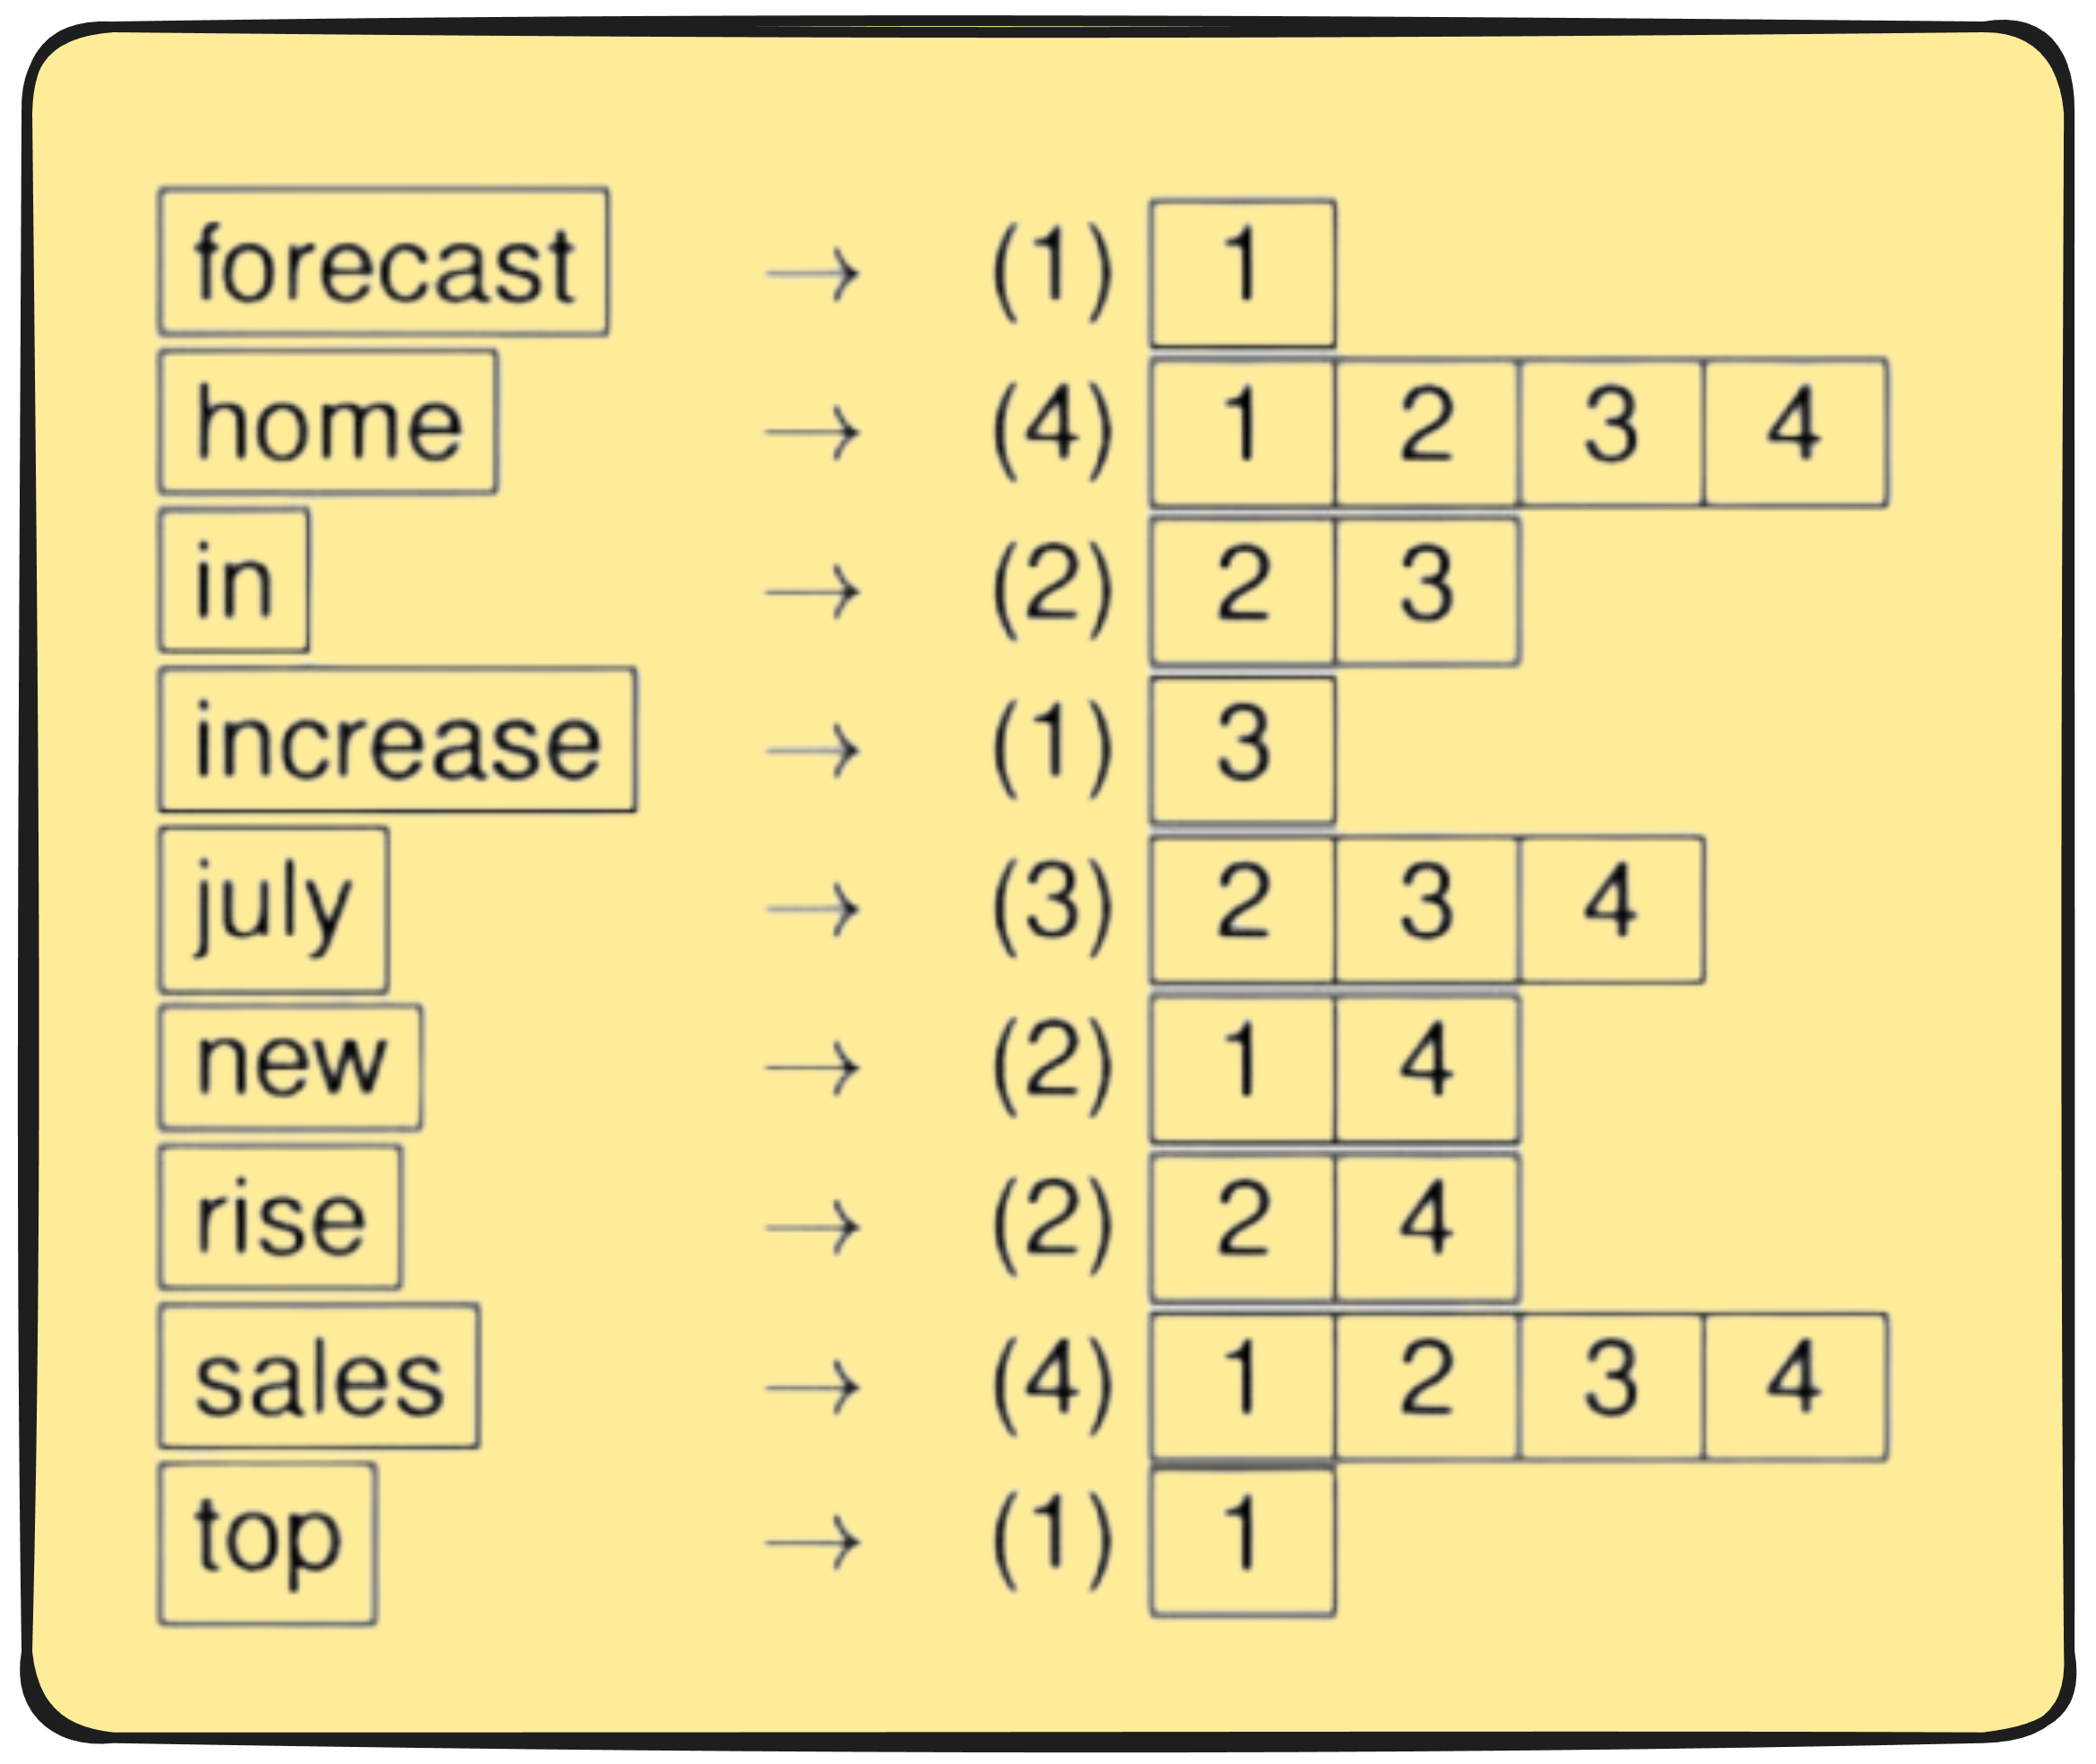

---

## Question 4: Let the following be a set of documents:
- D1: SDK, Android, Google, Mobile, Software
- D2: Song, Android, Radiohead, Paranoid, Yorke
- D3: SDK, System, Android, Kernel, Linux
- D4: Android, Mobile, Google, Software, System
- D5: Mobile, Swisscom, SMS, subscription, rate

And the following be a set of Boolean queries:
- R1: `Android OR SDK OR Google OR Mobile`
- R2: `Android AND SDK AND Google AND Mobile`

According to the Boolean model, what are the documents retrieved for each query ? 
- R1: `D1 D2 D3 D4 D5 `
- R2: `D1`

### Solution:


<details>
<summary>Click for Solution</summary>

Step 1: Map each term to its postings list (the documents it appears in):

* `Android` → {D1, D2, D3, D4}  
* `SDK` → {D1, D3}  
* `Google` → {D1, D4}  
* `Mobile` → {D1, D4, D5}  

Step 2: Query R1 `Android OR SDK OR Google OR Mobile`


* `Android` → {D1, D2, D3, D4}  
* `SDK` → {D1, D3}  
* `Google` → {D1, D4}  
* `Mobile` → {D1, D4, D5}  

Combining all these sets:  
{D1, D2, D3, D4} ∪ {D1, D3} ∪ {D1, D4} ∪ {D1, D4, D5} = **{D1, D2, D3, D4, D5}**

**Answer R1:** $\boxed{\textbf{D1, D2, D3, D4, D5}}$

---

Step 3: Query R2 `Android AND SDK AND Google AND Mobile`


* `Android` → {D1, D2, D3, D4}  
* `SDK` → {D1, D3}  
* `Google` → {D1, D4}  
* `Mobile` → {D1, D4, D5}  

* Intersection of {D1, D2, D3, D4} AND {D1, D3} → {D1, D3}  
* Intersection of {D1, D3} AND {D1, D4} → {D1}  
* Intersection of {D1} AND {D1, D4, D5} → {D1}  

Only Document 1 contains all four terms.

**Answer R2:** $\boxed{\textbf{D1}}$

</details>